In [1]:
import pandas as pd

In [24]:
df = pd.read_csv('./data/Telco_Cusomer_Churn.csv')

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [30]:
# Convert TotalCharges to a numeric type, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values in the TotalCharges column
missing_values = df['TotalCharges'].isnull().sum()
print(f'Number of missing values in TotalCharges: {missing_values}')

Number of missing values in TotalCharges: 11


In [31]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
# Drop rows with missing values
df.dropna(inplace=True)

In [33]:
# Drop the customerID column
df.drop('customerID', axis=1, inplace=True)

### Explolaratory data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

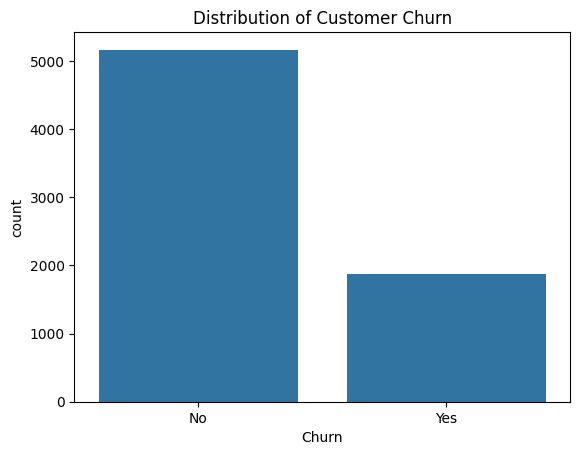

Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn rate: 26.58%


In [34]:
# Plot the distribution of the Churn variable
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

churn_counts = df['Churn'].value_counts()
print(churn_counts)
print(f'Churn rate: {churn_counts["Yes"] / df.shape[0] * 100:.2f}%')

this is an imbalance data here there are far more No than Yes churner, 

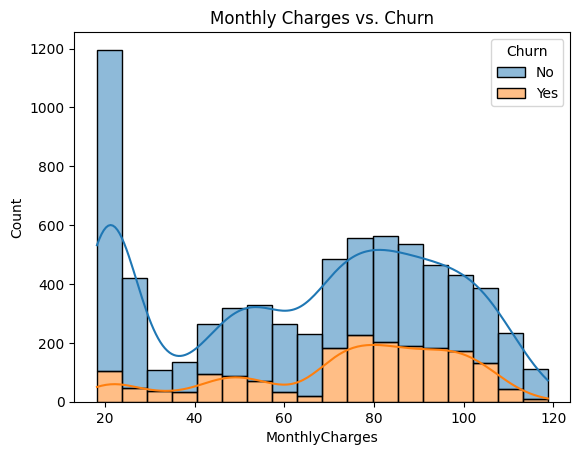

In [35]:
# Monthly charges disribution
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, multiple="stack")
plt.title('Monthly Charges vs. Churn')
plt.show()

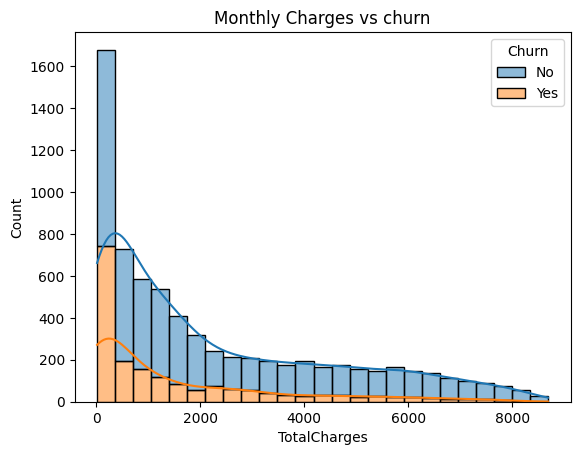

In [36]:
# TotalCharges distribution

sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, multiple='stack')
plt.title('Monthly Charges vs churn')
plt.show()

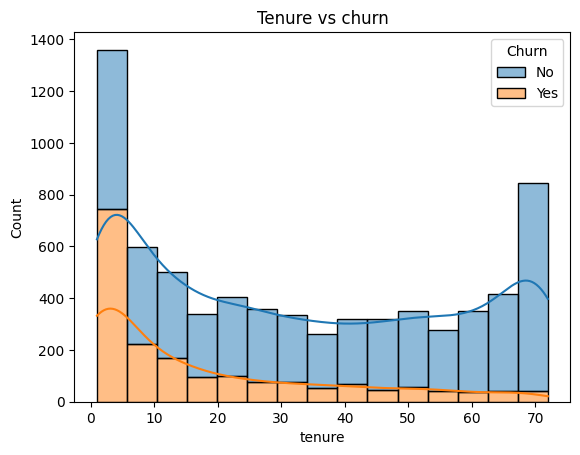

In [38]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack')
plt.title('Tenure vs churn')
plt.show()

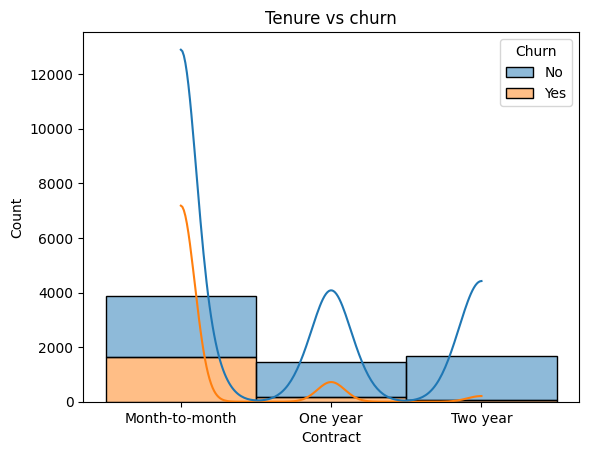

In [39]:
sns.histplot(data=df, x='Contract', hue='Churn', kde=True, multiple='stack')
plt.title('Tenure vs churn')
plt.show()

### Feature Encoding and scalling


In [40]:
# Identify all the object-type columns which are our categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# The 'Churn' column is our target variable, we will handle that separately, so we remove it from the list
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"Categorical columns to be encoded: {categorical_cols}")

# Apply one-hot encoding to the identified columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Now, we will encode our target variable 'Churn'
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the first few rows of the transformed DataFrame
print("\nDataFrame after One-Hot Encoding:")
df.head()

Categorical columns to be encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

DataFrame after One-Hot Encoding:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### Model Training

In [41]:
# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (after one-hot encoding)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [44]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8031272210376688

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Confusion Matrix:
 [[917 116]
 [161 213]]


In [46]:
import joblib

In [47]:
# Define the filenames
model_filename = 'churn_prediction_model.joblib'
scaler_filename = 'scaler.joblib'


In [48]:
joblib.dump(model, model_filename)
joblib.dump(scaler, scaler_filename)

['scaler.joblib']

In [49]:
print(f"Model saved to {model_filename}")
print(f"Scaler saved to {scaler_filename}")

Model saved to churn_prediction_model.joblib
Scaler saved to scaler.joblib


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')